$$\mathcal{R}_0^h =  \frac{\alpha_h\tau_h (S_h^* - V_h^*(\gamma_h -1))}{N_h^*(\mu_h+\tau_h)(\delta_h+\mu_h +\sigma_h)}.$$
$$\mathcal{R}_0^d  =  \frac{\alpha_d\tau_d (S_d^* - V_d^*(\gamma_d -1))}{N_d^*(c_E +\mu_d+\tau_d)(c_I+\delta_d+\mu_d +\sigma_d)}$$
$$\mathcal{R}_0^w  =  \frac{\alpha_w}{\mu_w N^*_w}.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats.qmc as qmc
from scipy.stats import spearmanr


$$S_h^* = \frac{\theta_h + \psi_h V_h}{\omega_h + \mu_h} = \frac{\theta_h\left[(\psi_h + \mu_h)(\omega_h + \mu_h)- \omega_h\psi_h\right] + \psi_h \omega_h \theta_h}{(\omega_h + \mu_h)[(\omega_h + \mu_h)(\psi_h + \mu_h)-\omega_h\psi_h]}$$
$$ V_h^*   = \frac{\omega_h \theta_h}{(\psi_h + \mu_h)(\omega_h + \mu_h)- \omega_h\psi_h}$$

$$ S_d^*  = \frac{\theta_d + \psi_d V_d}{\omega_d + \mu_d} = \frac{\theta_d\left[(\psi_d + \mu_d)(\omega_d + \mu_d)- \omega_d\psi_d\right] + \psi_d \omega_d \theta_d}{(\omega_d + \mu_d)[(\omega_d + \mu_d)(\psi_d + \mu_d)-\omega_d\psi_d]}$$
$$V_d^*   = \frac{\omega_d \theta_d}{(\psi_d + \mu_d)(\omega_d + \mu_d)- \omega_d\psi_d}$$

In [2]:
#!pip install sobol_seq
#import sobol_seq
#print("sobol_seq installed successfully!")

# Reproduction Number
$$\mathcal{R}_0^h =  \frac{\alpha_h\tau_h (S_h^* - V_h^*(\gamma_h -1))}{N_h^*(\mu_h+\tau_h)(\delta_h+\mu_h +\sigma_h)}.$$
$$\mathcal{R}_0^d  =  \frac{\alpha_d\tau_d (S_d^* - V_d^*(\gamma_d -1))}{N_d^*(c_E +\mu_d+\tau_d)(c_I+\delta_d+\mu_d +\sigma_d)}$$
$$\mathcal{R}_0^w  =  \frac{\alpha_w}{\sigma_w +\mu_w}.$$


**Sensitivity Analysis**

PRCC (human):    {'alpha_h': 0.9609518875304197, 'tau_h': 0.6423697705906348, 'sigma_h': -0.03700328708722596, 'omega_h': -0.7583954163551666, 'psi_h': 0.3113429783991269, 'gamma_h': -0.7082748642336578, 'mu_h': -0.9641016443535257, 'delta_h': -0.6858405581019158}
PRCC (domestic): {'alpha_d': 0.9454950748596828, 'tau_d': 0.563959776066092, 'sigma_d': -0.5855175110546237, 'omega_d': -0.7701531337749042, 'psi_d': 0.4203093253875252, 'gamma_d': -0.7675375638492914, 'mu_d': -0.5967540740627487, 'c_E': -0.37048419813159256, 'c_I': -0.976577571602164}
PRCC (wild):     {'alpha_w': 0.9853433077351692, 'sigma_w': -0.8705398119195371, 'mu_w': -0.9656715756536172}


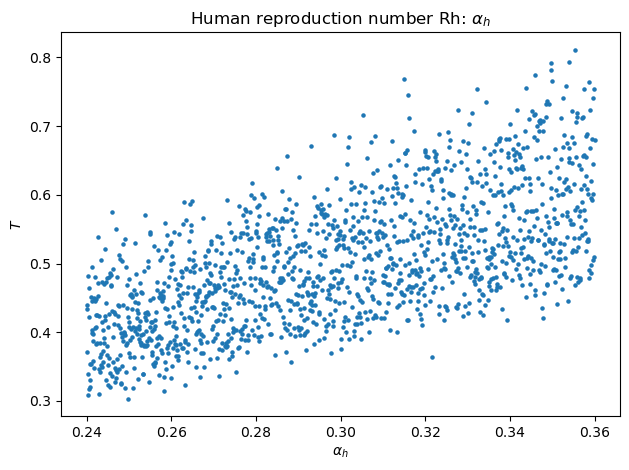

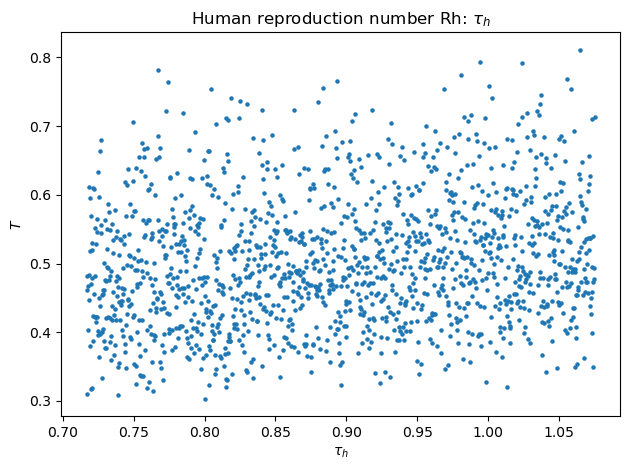

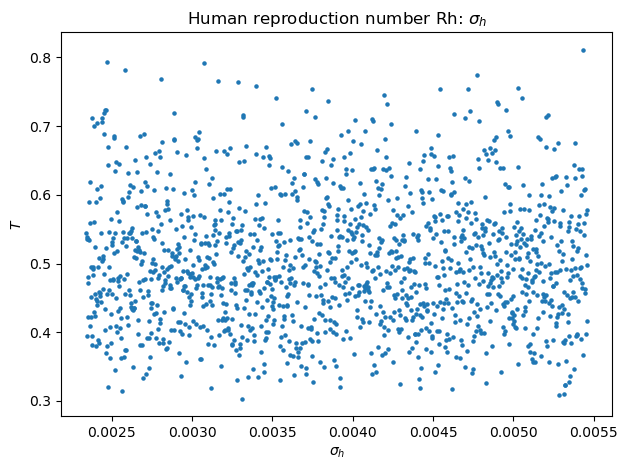

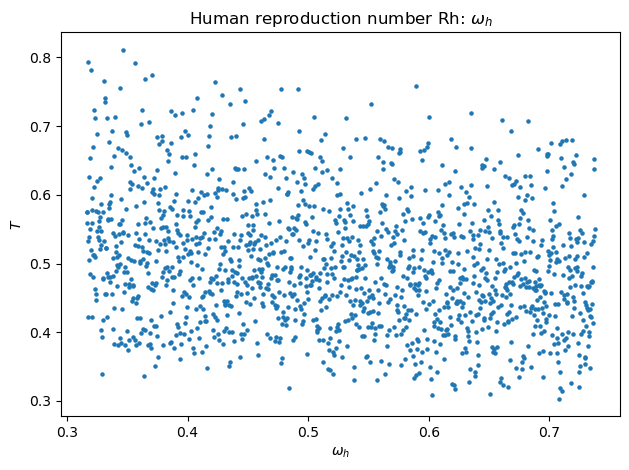

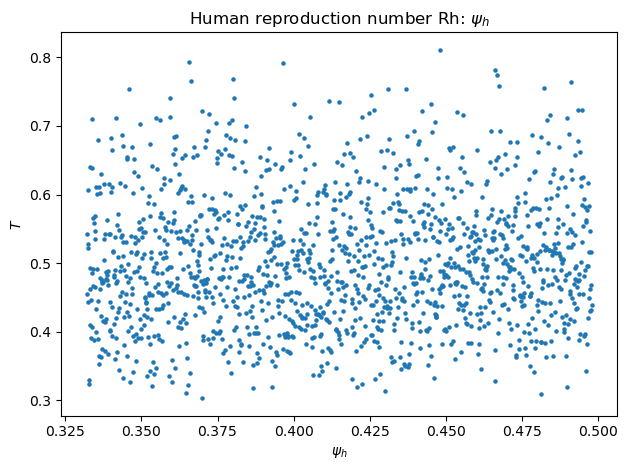

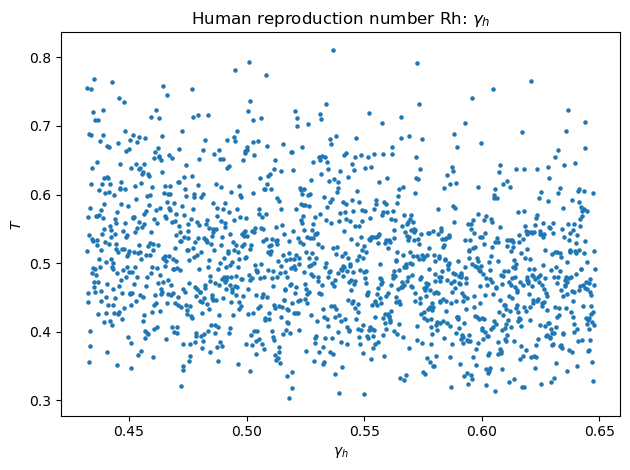

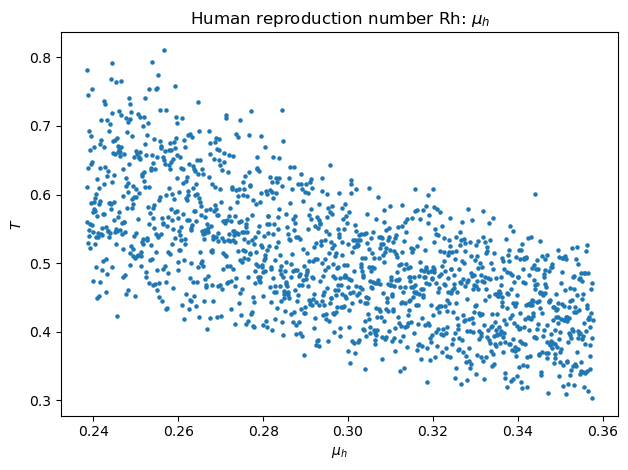

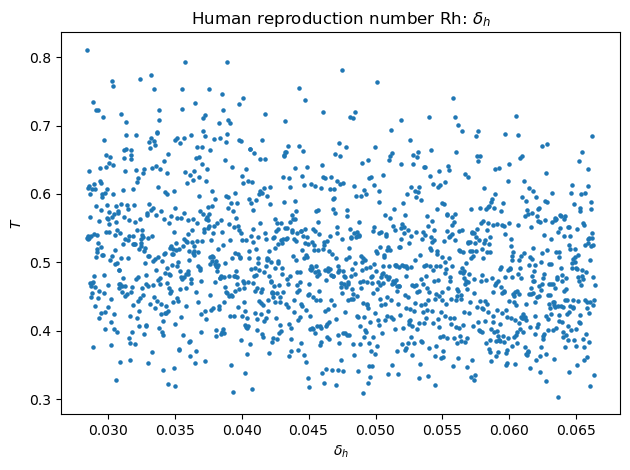

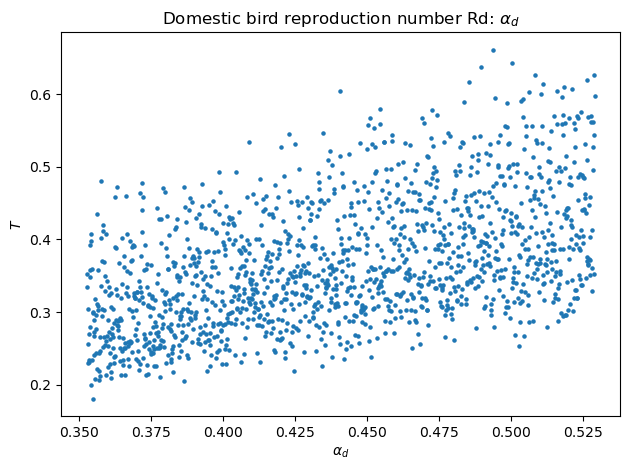

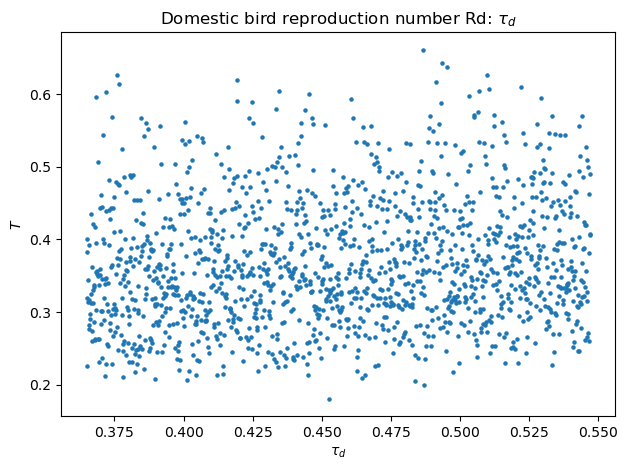

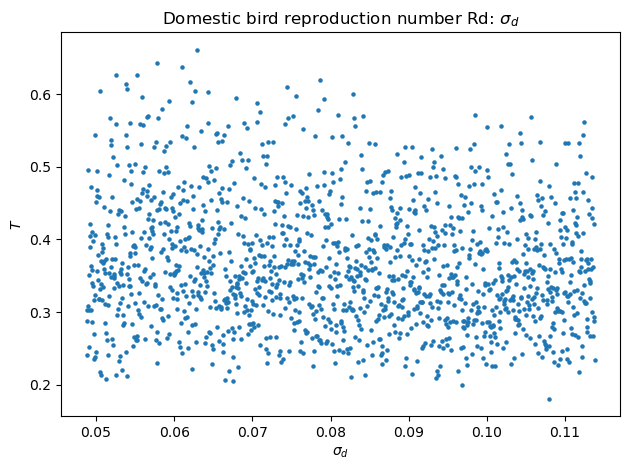

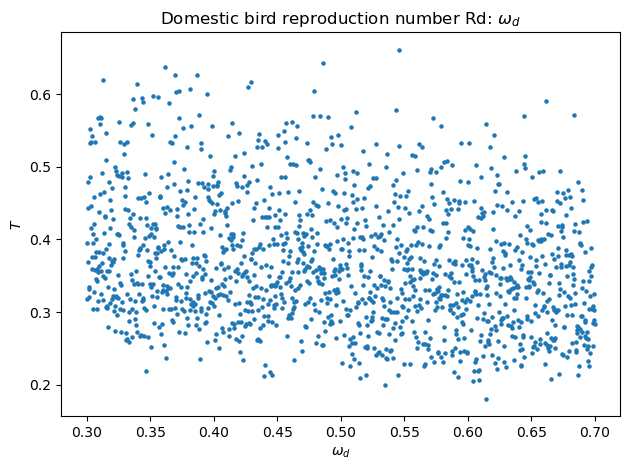

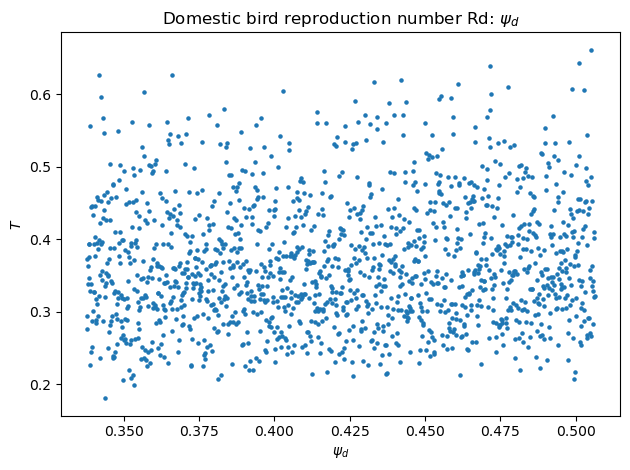

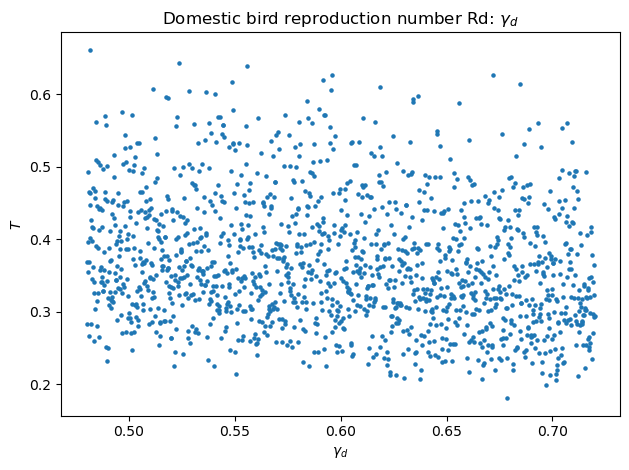

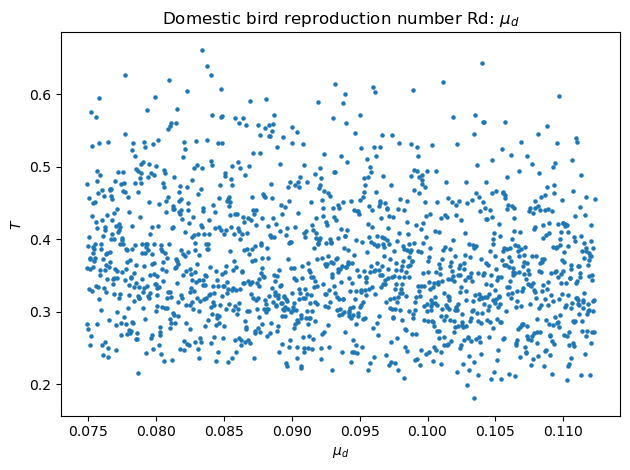

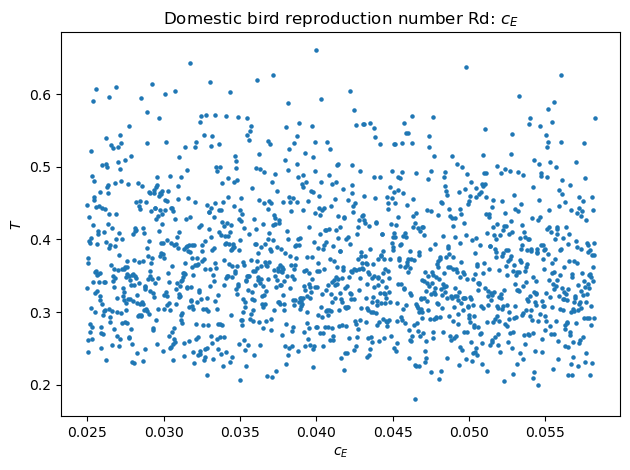

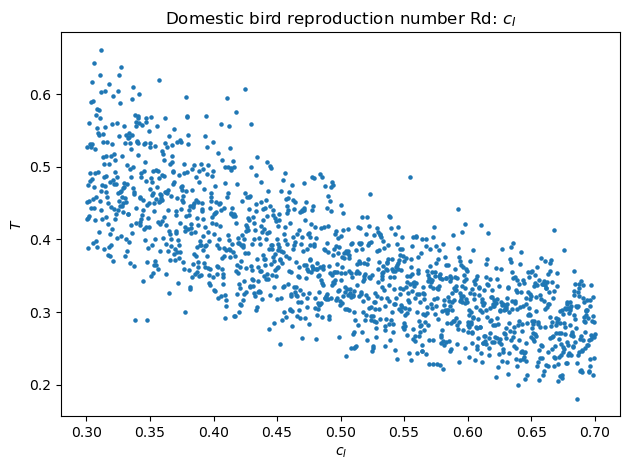

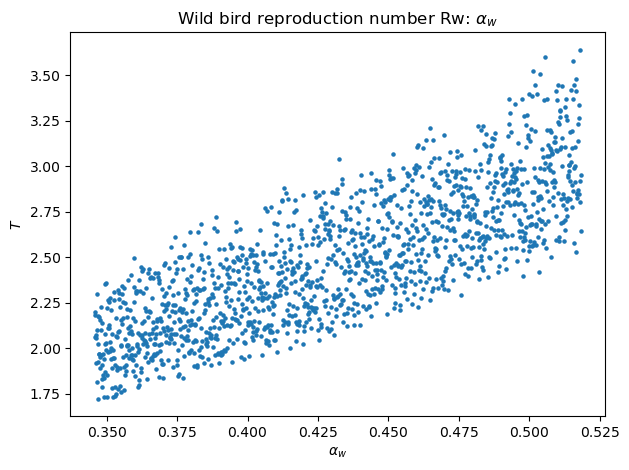

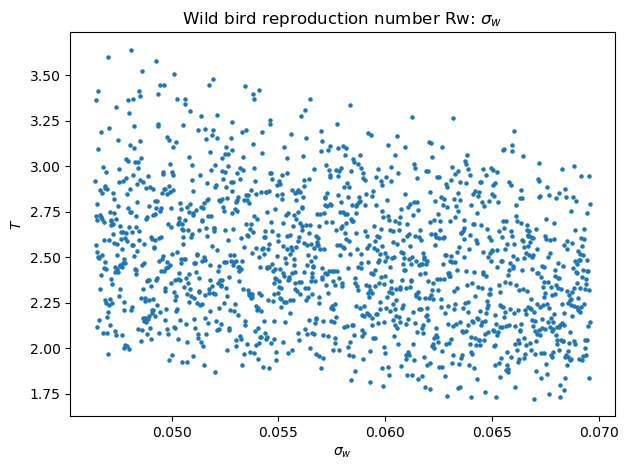

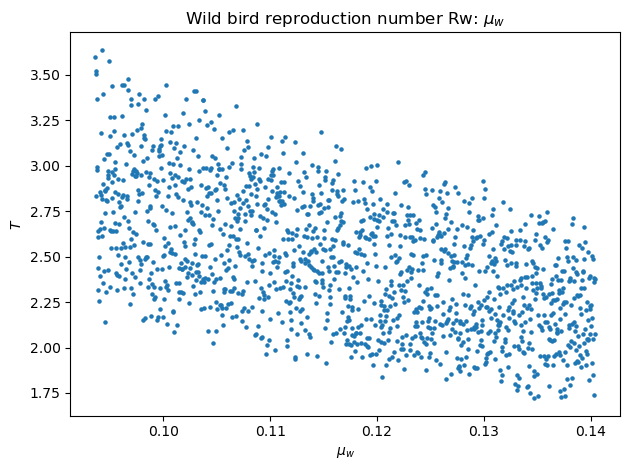

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc, rankdata

plt.rcParams["text.usetex"] = False  # use mathtext (works out of the box)

# =========================
# Baseline parameters
# =========================
base = {
    'theta_h': 0.479, 'theta_d': 0.1,   'theta_w': 0.524,  # theta_w included for completeness
    'delta_h': 0.0474,
    'alpha_h': 0.30,  'alpha_d': 0.441, 'alpha_w': 0.432,
    'tau_h': 0.896,   'tau_d': 0.456,
    'sigma_h': 0.0039,'sigma_d': 0.0813, 'sigma_w': 0.058,
    'omega_h': 0.527, 'omega_d': 0.50,
    'psi_h': 0.415,   'psi_d': 0.422, 'psi_w': 0.038,
    'gamma_h': 0.54,  'gamma_d': 0.60,
    'c_E': 0.0416,    'c_I': 0.50,
    'mu_h': 0.298,    'mu_d': 0.0936, 'mu_w': 0.117,
}

# =========================
# Host-specific parameter sets and labels
# =========================
human_params    = ['alpha_h','tau_h','sigma_h','omega_h','psi_h','gamma_h','mu_h','delta_h']
domestic_params = ['alpha_d','tau_d','sigma_d','omega_d','psi_d','gamma_d','mu_d','c_E','c_I']
wild_params     = ['alpha_w','sigma_w', 'mu_w']

labels_h = [ r'$\alpha_h$', r'$\tau_h$', r'$\sigma_h$', r'$\omega_h$',
            r'$\psi_h$', r'$\gamma_h$', r'$\mu_h$', r'$\delta_h$']
labels_d = [ r'$\alpha_d$', r'$\tau_d$', r'$\sigma_d$', r'$\omega_d$',
            r'$\psi_d$', r'$\gamma_d$', r'$\mu_d$', r'$c_E$', r'$c_I$']
labels_w = [ r'$\alpha_w$', r'$\sigma_w$',  r'$\mu_w$']

# =========================
# Effective susceptible fractions (frequency-dependent DFE; independent of theta)
# =========================
def eff_h(par):
    denom = par['mu_h'] + par['psi_h'] + par['omega_h']
    v = par['omega_h'] / denom
    return 1.0 - par['gamma_h'] * v

def eff_d(par):
    denom = par['mu_d'] + par['psi_d'] + par['omega_d']
    v = par['omega_d'] / denom
    return 1.0 - par['gamma_d'] * v

# =========================
# Host-specific reproduction numbers (frequency incidence)
# =========================
def Th(par):
    surv = par['tau_h'] / (par['tau_h'] + par['mu_h'])
    return (surv * eff_h(par) * par['alpha_h']) / (par['sigma_h'] + par['mu_h'] + par['delta_h'])

def Td(par):
    surv = par['tau_d'] / (par['tau_d'] + par['mu_d'] + par['c_E'])
    return (surv * eff_d(par) * par['alpha_d']) / (par['sigma_d'] + par['mu_d'] + par['c_I'])

def Tw(par):
    return par['alpha_w'] / (par['sigma_w'] + par['mu_w'])

# =========================
# PRCC via correlation-matrix inversion (partial Spearman)
# =========================
def prcc_matrix(X, Y):
    Xr = np.apply_along_axis(rankdata, 0, X)
    Yr = rankdata(Y)
    M = np.column_stack([Xr, Yr])
    R = np.corrcoef(M, rowvar=False)
    P = np.linalg.pinv(R)
    out = np.zeros(X.shape[1])
    k = X.shape[1]
    for i in range(k):
        out[i] = -P[i, k] / np.sqrt(P[i, i] * P[k, k])
    return out

# =========================
# LHS + PRCC runner (per host) modified to return samples and outputs
# =========================
def host_prcc_samples(host_keys, R_func, n=1500, pct=0.20, widen=None):
    b = np.array([base.get(k, 1.0) for k in host_keys], dtype=float)
    low = (1 - pct) * b
    high = (1 + pct) * b

    if widen:
        for k, mult in widen.items():
            if k in host_keys:
                i = host_keys.index(k)
                low[i] = max(0.0, b[i] * (1 - mult))
                high[i] = b[i] * (1 + mult)

    prob_like = {'alpha_h','alpha_d','alpha_w','gamma_h','gamma_d'}
    for i, k in enumerate(host_keys):
        if k in prob_like:
            low[i] = max(0.0, low[i])
            high[i] = min(1.0, high[i])

    sampler = qmc.LatinHypercube(d=len(host_keys), seed=42)
    U = sampler.random(n)
    S = low + U * (high - low)

    Y = np.zeros(n)
    for i in range(n):
        par = {hk: S[i, j] for j, hk in enumerate(host_keys)}
        for k in base:
            if k not in par:
                par[k] = base[k]
        Y[i] = R_func(par)

    vals = prcc_matrix(S, Y)
    return S, Y, vals

# =========================
# Generate samples and PRCC for each host
# =========================
widen_h = {'omega_h': 0.40, 'sigma_h': 0.40, 'delta_h': 0.40}
widen_d = {'omega_d': 0.40, 'sigma_d': 0.40, 'c_E': 0.40, 'c_I': 0.40}
widen_w = None

S_h, Th_vals, prcc_h = host_prcc_samples(human_params, Th, n=1500, pct=0.20, widen=widen_h)
S_d, Td_vals, prcc_d = host_prcc_samples(domestic_params, Td, n=1500, pct=0.20, widen=widen_d)
S_w, Tw_vals, prcc_w = host_prcc_samples(wild_params, Tw, n=1500, pct=0.20, widen=widen_w)

print("PRCC (human):   ", dict(zip(human_params, prcc_h)))
print("PRCC (domestic):", dict(zip(domestic_params, prcc_d)))
print("PRCC (wild):    ", dict(zip(wild_params, prcc_w)))

# =========================
# Scatterplots: parameter vs R0 for each host
# =========================

def scatter_host(S, R_vals, host_keys, labels, title_prefix):
    n_params = S.shape[1]
    for j in range(n_params):
        plt.figure()
        plt.scatter(S[:, j], R_vals, s=5)
        plt.xlabel(labels[j])
        plt.ylabel(r'$T$')
        plt.title(f"{title_prefix}: {labels[j]}")
        plt.tight_layout()
        plt.show()

scatter_host(S_h, Th_vals, human_params, labels_h, "Human reproduction number Rh")
scatter_host(S_d, Td_vals, domestic_params, labels_d, "Domestic bird reproduction number Rd")
scatter_host(S_w, Tw_vals, wild_params, labels_w, "Wild bird reproduction number Rw")


**Partial Rank Correlation Coefficient (PRCC)**

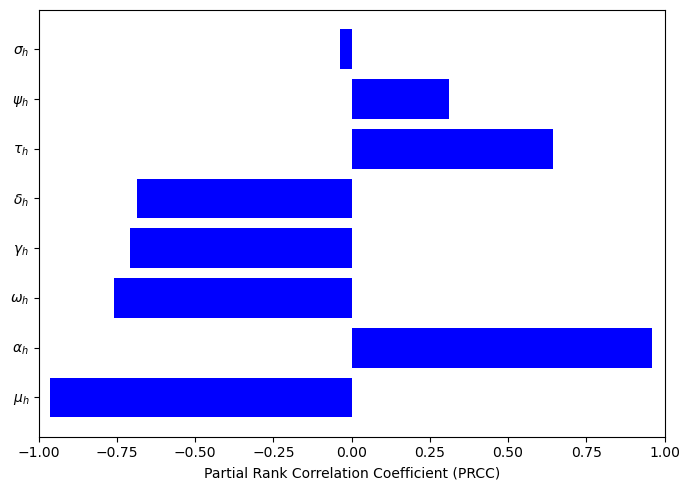

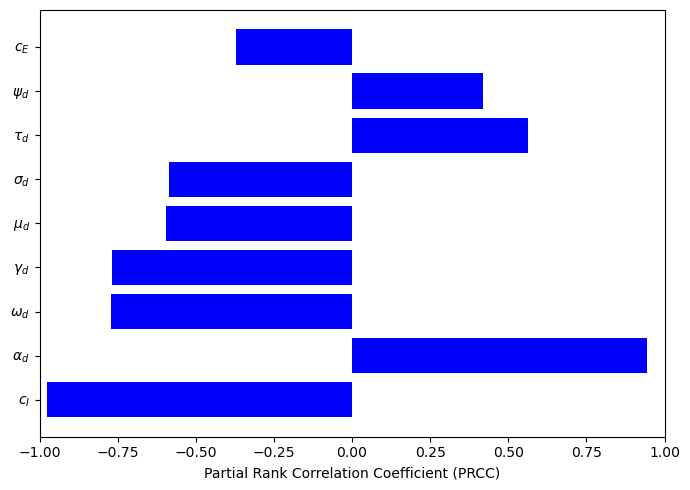

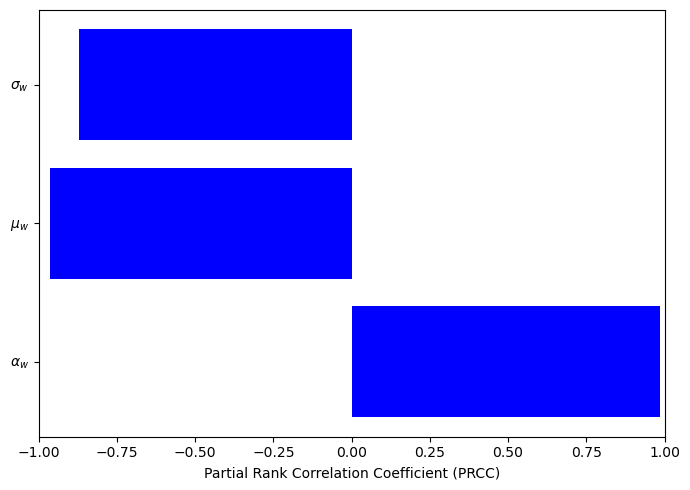

PRCC (human):    {'alpha_h': 0.9609518875304197, 'tau_h': 0.6423697705906348, 'sigma_h': -0.03700328708722596, 'omega_h': -0.7583954163551666, 'psi_h': 0.3113429783991269, 'gamma_h': -0.7082748642336578, 'mu_h': -0.9641016443535257, 'delta_h': -0.6858405581019158}
PRCC (domestic): {'alpha_d': 0.9454950748596828, 'tau_d': 0.563959776066092, 'sigma_d': -0.5855175110546237, 'omega_d': -0.7701531337749042, 'psi_d': 0.4203093253875252, 'gamma_d': -0.7675375638492914, 'mu_d': -0.5967540740627487, 'c_E': -0.37048419813159256, 'c_I': -0.976577571602164}
PRCC (wild):     {'alpha_w': 0.9853433077351692, 'sigma_w': -0.8705398119195371, 'mu_w': -0.9656715756536172}


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc, rankdata

plt.rcParams["text.usetex"] = False  # use mathtext (works out of the box)

# =========================
# Baseline parameters
# =========================
base = {
    'theta_h': 0.479, 'theta_d': 0.1,   'theta_w': 0.524,  # theta_w included for completeness
    'delta_h': 0.0474,
    'alpha_h': 0.30,  'alpha_d': 0.441, 'alpha_w': 0.432,
    'tau_h': 0.896,   'tau_d': 0.456,
    'sigma_h': 0.0039,'sigma_d': 0.0813, 'sigma_w': 0.058,
    'omega_h': 0.527, 'omega_d': 0.50,
    'psi_h': 0.415,   'psi_d': 0.422, 'psi_w': 0.038,
    'gamma_h': 0.54,  'gamma_d': 0.60,
    'c_E': 0.0416,    'c_I': 0.50,
    'mu_h': 0.298,    'mu_d': 0.0936, 'mu_w': 0.117,
}

# =========================
# Host-specific parameter sets and labels
# =========================
human_params    = ['alpha_h','tau_h','sigma_h','omega_h','psi_h','gamma_h','mu_h','delta_h']
domestic_params = ['alpha_d','tau_d','sigma_d','omega_d','psi_d','gamma_d','mu_d','c_E','c_I']
wild_params     = ['alpha_w','sigma_w', 'mu_w']  # if theta_w included; PRCC should be ~0 under frequency incidence

labels_h = [ r'$\alpha_h$', r'$\tau_h$', r'$\sigma_h$', r'$\omega_h$',
            r'$\psi_h$', r'$\gamma_h$', r'$\mu_h$', r'$\delta_h$']
labels_d = [ r'$\alpha_d$', r'$\tau_d$', r'$\sigma_d$', r'$\omega_d$',
            r'$\psi_d$', r'$\gamma_d$', r'$\mu_d$', r'$c_E$', r'$c_I$']
labels_w = [ r'$\alpha_w$', r'$\sigma_w$',  r'$\mu_w$']

# =========================
# Effective susceptible fractions (frequency-dependent DFE; independent of theta)
# s = (mu + psi) / (mu + psi + omega), v = omega / (mu + psi + omega)
# eff = 1 - gamma * v
# =========================
def eff_h(par):
    denom = par['mu_h'] + par['psi_h'] + par['omega_h']
    v = par['omega_h'] / denom
    return 1.0 - par['gamma_h'] * v

def eff_d(par):
    denom = par['mu_d'] + par['psi_d'] + par['omega_d']
    v = par['omega_d'] / denom
    return 1.0 - par['gamma_d'] * v

# =========================
# Host-specific reproduction numbers (frequency incidence)
# =========================
def Th(par):
    surv = par['tau_h'] / (par['tau_h'] + par['mu_h'])
    return (surv * eff_h(par) * par['alpha_h']) / (par['sigma_h'] + par['mu_h'] + par['delta_h'])

def Td(par):
    surv = par['tau_d'] / (par['tau_d'] + par['mu_d'] + par['c_E'])
    return (surv * eff_d(par) * par['alpha_d']) / (par['sigma_d'] + par['mu_d'] + par['c_I'])

def Tw(par):
    # frequency incidence => S_w^*/N_w^* = 1, so theta_w cancels; Tw depends only on alpha_w, mu_w
    return par['alpha_w'] / (par['sigma_w'] + par['mu_w'])

# =========================
# PRCC via correlation-matrix inversion (partial Spearman)
# =========================
def prcc_matrix(X, Y):
    Xr = np.apply_along_axis(rankdata, 0, X)
    Yr = rankdata(Y)
    M = np.column_stack([Xr, Yr])
    R = np.corrcoef(M, rowvar=False)
    P = np.linalg.pinv(R)
    out = np.zeros(X.shape[1])
    k = X.shape[1]
    for i in range(k):
        out[i] = -P[i, k] / np.sqrt(P[i, i] * P[k, k])
    return out

# =========================
# LHS + PRCC runner (per host)
# =========================

def host_prcc(host_keys, labels, R_func, title, filename, n=1500, pct=0.20, widen=None):
    b = np.array([base.get(k, 1.0) for k in host_keys], dtype=float)
    low = (1 - pct) * b
    high = (1 + pct) * b

    # Optionally widen key controls so signs are clearer
    if widen:
        for k, mult in widen.items():
            if k in host_keys:
                i = host_keys.index(k)
                low[i] = max(0.0, b[i] * (1 - mult))
                high[i] = b[i] * (1 + mult)

    # Clip probabilities to [0,1]
    prob_like = {'alpha_h','alpha_d','alpha_w','gamma_h','gamma_d'}
    for i, k in enumerate(host_keys):
        if k in prob_like:
            low[i] = max(0.0, low[i])
            high[i] = min(1.0, high[i])

    # Latin Hypercube Sampling with fixed seed for reproducibility
    sampler = qmc.LatinHypercube(d=len(host_keys), seed=42)
    U = sampler.random(n)
    S = low + U * (high - low)

    # Evaluate T for each sample (fill non-host params from baseline)
    Y = np.zeros(n)
    for i in range(n):
        par = {hk: S[i, j] for j, hk in enumerate(host_keys)}
        for k in base:
            if k not in par:
                par[k] = base[k]
        Y[i] = R_func(par)

    # PRCC
    vals = prcc_matrix(S, Y)

    # Plot
    order = np.argsort(np.abs(vals))[::-1]
    plt.figure(figsize=(7, 5))
    plt.barh([labels[i] for i in order], vals[order], color='b')
    plt.xlabel('Partial Rank Correlation Coefficient (PRCC)')
    plt.xlim([-1, 1])
    plt.tight_layout()
    #plt.savefig(filename, dpi=300, bbox_inches="tight")
    #plt.close()
    plt.show()

    return dict(zip(host_keys, vals))

# =========================
# Run per host and save plots
# =========================
widen_h = {'omega_h': 0.40, 'sigma_h': 0.40, 'delta_h': 0.40}
widen_d = {'omega_d': 0.40, 'sigma_d': 0.40, 'c_E': 0.40, 'c_I': 0.40}
widen_w = None

prcc_h = host_prcc(human_params, labels_h, Th, "PRCC for Th (human)", "PCCopy_human.png", n=1500, pct=0.20, widen=widen_h)
prcc_d = host_prcc(domestic_params, labels_d, Td, "PRCC for Td (domestic)", "PCCopy_domestic.png", n=1500, pct=0.20, widen=widen_d)
prcc_w = host_prcc(wild_params, labels_w, Tw, "PRCC for Tw (wild)", "PCCopy_wild.png", n=1500, pct=0.20, widen=widen_w)

print("PRCC (human):   ", prcc_h)
print("PRCC (domestic):", prcc_d)
print("PRCC (wild):    ", prcc_w)
